In [1]:
# Import libraries

import numpy as np
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to load X values
def load_color_inputs():
    X_train_color = pickle.load(open('E:/training_color.pkl', "rb"))
    X_valid_color = pickle.load(open('E:/validation_color.pkl', "rb"))
    X_test_color = pickle.load(open('E:/testing_color.pkl', "rb"))
    return X_train_color, X_valid_color, X_test_color

# Function to load y values
def load_outputs():
    y_train = pickle.load(open('E:/y_training.pkl', "rb"))
    y_valid = pickle.load(open('E:/y_validation.pkl', "rb"))
    y_test = pickle.load(open('E:/y_testing.pkl', "rb"))
    return y_train, y_valid, y_test

# Load in X, y data
X_train_color, X_valid_color, X_test_color = load_color_inputs()
y_train_color, y_valid_color, y_test_color = load_outputs()

# Shuffle data
np.random.seed(200)
X_train_color, X_valid_color, X_test_color = np.random.permutation(X_train_color), np.random.permutation(X_valid_color), np.random.permutation(X_test_color)
np.random.seed(200)
y_train_color, y_valid_color, y_test_color = np.random.permutation(y_train_color), np.random.permutation(y_valid_color), np.random.permutation(y_test_color)

In [5]:
# Hyper parameter tuning using GridSearch
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,25)],
    'max_iter': [100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True, False]
}
grid = GridSearchCV(clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train_color, y_train_color)

print(grid.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'sgd'}


C:\Users\kaskn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
clf = MLPClassifier(random_state=1,alpha=0.0001, early_stopping=False, hidden_layer_sizes=(120, 80, 40), learning_rate='adaptive', max_iter=500, activation='tanh', solver='sgd').fit(X_train_color, y_train_color)

C:\Users\kaskn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
clf.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (120, 80, 40),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [4]:
# Test accuracy on Validation set
y_pred = clf.predict(X_valid_color)
print('Accuracy: {:.6f}'.format(accuracy_score(y_valid_color, y_pred)))

Accuracy: 0.971875


In [6]:
# Save Model
pickle.dump(clf, open(r"MLP_color_model", "wb"))

In [3]:
# Load Model
model = pickle.load(open(r"MLP_color_model", "rb"))

In [8]:
# Test accuracy on Test set
y_pred = clf.predict(X_test_color)
print('Accuracy: {:.6f}'.format(accuracy_score(y_test_color, y_pred)))

Accuracy: 0.985938


In [9]:
# Predict the values from the validation dataset and convert predictions classes to one hot vectors
categories = ['Left to right', "Pull", "Push", "Right to left"]
y_pred = model.predict(X_test_color)

print(classification_report(y_test_color, y_pred, target_names=categories, digits=4))

               precision    recall  f1-score   support

Left to right     0.9695    0.9938    0.9815       160
         Pull     0.9937    0.9812    0.9874       160
         Push     0.9874    0.9812    0.9843       160
Right to left     0.9937    0.9875    0.9906       160

     accuracy                         0.9859       640
    macro avg     0.9861    0.9859    0.9860       640
 weighted avg     0.9861    0.9859    0.9860       640



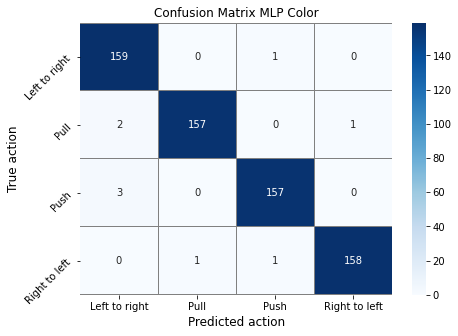

In [10]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test_color, y_pred) 
# plot the confusion matrix
categories = ['Left to right', "Pull", "Push", "Right to left"]
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="grey", fmt= 'g',ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted action", fontsize=12)
plt.ylabel("True action", fontsize=12)
plt.title("Confusion Matrix MLP Color")
locs, labels = plt.yticks()
plt.setp(labels, rotation=45)
plt.show()